In [1]:
!wget https://mettl-arq.s3-ap-southeast-1.amazonaws.com/questions/jp-morgan/quant-challenge-2020/derivatives-modelling/Q1_Data.csv

--2020-09-27 13:26:09--  https://mettl-arq.s3-ap-southeast-1.amazonaws.com/questions/jp-morgan/quant-challenge-2020/derivatives-modelling/Q1_Data.csv
Resolving mettl-arq.s3-ap-southeast-1.amazonaws.com (mettl-arq.s3-ap-southeast-1.amazonaws.com)... 52.219.133.43
Connecting to mettl-arq.s3-ap-southeast-1.amazonaws.com (mettl-arq.s3-ap-southeast-1.amazonaws.com)|52.219.133.43|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1121 (1.1K) [text/csv]
Saving to: ‘Q1_Data.csv.1’

Q1_Data.csv.1       100%[===================>]   1.09K  --.-KB/s    in 0s      

2020-09-27 13:26:10 (73.0 MB/s) - ‘Q1_Data.csv.1’ saved [1121/1121]



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [3]:
dataframe = pd.read_csv('/content/data.csv')

In [4]:
dataframe.head()

,Date,Price
0,10/31/2020,520.349403
1,11/30/2020,524.764215
2,12/31/2020,574.740259
3,1/31/2021,602.355246
4,2/28/2021,593.415544


In [5]:
numpoints = dataframe['Date'].size
print(numpoints)

48


In [6]:
months = [i for i in range(numpoints)]

In [7]:
prices = dataframe['Price']

In [8]:
# print(prices)

In [9]:
print(len(prices))
print(len(months))

48
48


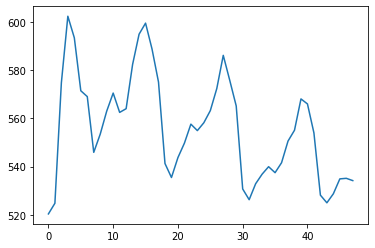

In [10]:
plt.plot(months, prices)

We can observe the seasonality. We can observe a similar pattern repeating. This is called a period. We can observe that each period has almost 4 different points, where the first derivative is 0(subgradient due to peak). These points are considered as anchor points.

In [11]:
# Grouping anchor points
anchor1 = [min(prices[0:8]), min(prices[5:10]), min(prices[15:25]), min(prices[27:35]), min(prices[40:])]
anchor2 = [prices[1], (prices[11]+prices[12])/2, (prices[22]+prices[23])/2, (prices[34]+prices[35])/2, prices[46]]
anchor3 = [max(prices[2:8]), max(prices[12:18]), max(prices[20:30]), max(prices[35:40])]
anchor4 = [(prices[5]+prices[6])/2, (prices[17]+prices[18])/2, (prices[29]+prices[30])/2, (prices[41]+prices[42])/2]

In [12]:
print(anchor1)
print(anchor2)
print(anchor3)
print(anchor4)

[520.3494032, 545.8955607, 535.4571411999999, 526.2513983, 524.9593148]
[524.7642146000001, 563.2336299000001, 556.25304175, 538.69717895, 535.1171913]
[602.3552461, 599.4953259, 586.1306276, 568.0591059999999]
[570.2334389499999, 558.15265535, 547.92094995, 541.0415932999999]


In [13]:
# We can observe that every anchor almost repeats itself after 12 months
x1 = [0, 7, 19, 31, 43]
x2 = [1, 11.5, 22.5, 34.5, 46]
x3 = [3, 15, 27, 39]
x4 = [5.5, 17.5, 29.5, 41.5]

In [14]:
f1 = interp1d(x1, anchor1, kind='cubic', fill_value="extrapolate")
f2 = interp1d(x2, anchor2, kind='cubic', fill_value="extrapolate")
f3 = interp1d(x3, anchor3, kind='cubic', fill_value="extrapolate")
f4 = interp1d(x4, anchor4, kind='cubic', fill_value="extrapolate")

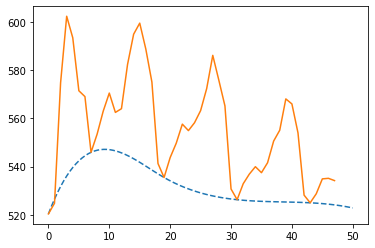

In [15]:
xtemp = np.linspace(0, 50, num=100, endpoint=True)
ytemp = f1(xtemp)
plt.plot(xtemp, ytemp, '--')
plt.plot(months, prices)
# plt.scatter(x1+12, f1(x1[-1])+12)

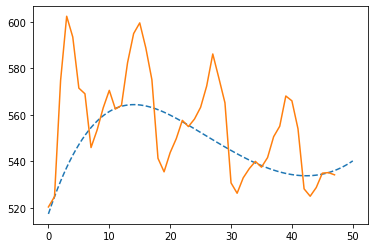

In [16]:
xtemp = np.linspace(0, 50, num=100, endpoint=True)
ytemp = f2(xtemp)
plt.plot(xtemp, ytemp, '--')
plt.plot(months, prices)

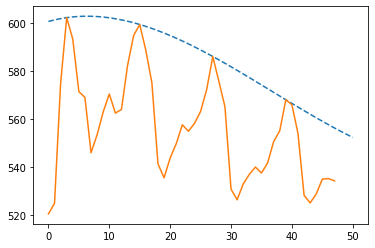

In [17]:
xtemp = np.linspace(0, 50, num=100, endpoint=True)
ytemp = f3(xtemp)
plt.plot(xtemp, ytemp, '--')
plt.plot(months, prices)

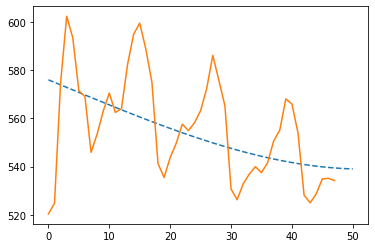

In [18]:
xtemp = np.linspace(0, 50, num=100, endpoint=True)
ytemp = f4(xtemp)
plt.plot(xtemp, ytemp, '--')
plt.plot(months, prices)

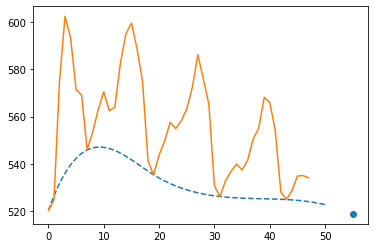

In [19]:
xtemp = np.linspace(0, 50, num=100, endpoint=True)
ytemp = f1(xtemp)
plt.plot(xtemp, ytemp, '--')
plt.plot(months, prices)
plt.scatter(x1[-1]+12, f1(x1[-1]+12))

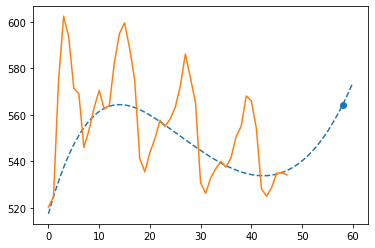

In [20]:
xtemp = np.linspace(0, 60, num=100, endpoint=True)
ytemp = f2(xtemp)
plt.plot(xtemp, ytemp, '--')
plt.plot(months, prices)
plt.scatter(x2[-1]+12, f2(x2[-1]+12))

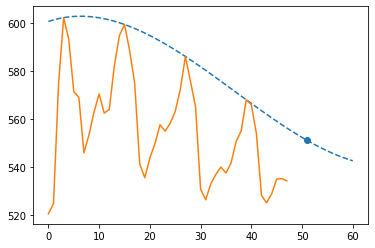

In [21]:
xtemp = np.linspace(0, 60, num=100, endpoint=True)
ytemp = f3(xtemp)
plt.plot(xtemp, ytemp, '--')
plt.plot(months, prices)
plt.scatter(x3[-1]+12, f3(x3[-1]+12))

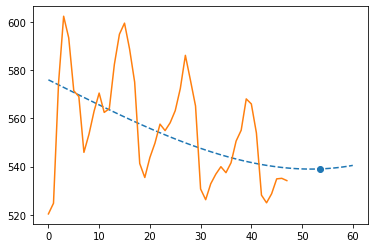

In [22]:
xtemp = np.linspace(0, 60, num=100, endpoint=True)
ytemp = f4(xtemp)
plt.plot(xtemp, ytemp, '--')
plt.plot(months, prices)
plt.scatter(x4[-1]+12, f4(x4[-1]+12))

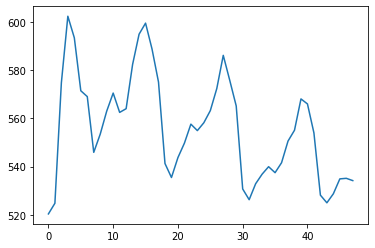

In [23]:
plt.plot(months, prices)

Done Interpolation of anchor data points, now we have to upsample the data from monthly frequency to daily frequency.

In [24]:
# upsampled = dataframe.resample('D')
dataframe['Dates'] = pd.to_datetime(dataframe['Date'])

In [25]:
print(dataframe.head())

         Date       Price      Dates
0  10/31/2020  520.349403 2020-10-31
1  11/30/2020  524.764215 2020-11-30
2  12/31/2020  574.740259 2020-12-31
3   1/31/2021  602.355246 2021-01-31
4   2/28/2021  593.415544 2021-02-28


In [26]:
dataframe2 = dataframe.filter(['Dates'], axis=1)
dataframe2['prices'] = dataframe['Price']

In [27]:
print(dataframe2.head())

       Dates      prices
0 2020-10-31  520.349403
1 2020-11-30  524.764215
2 2020-12-31  574.740259
3 2021-01-31  602.355246
4 2021-02-28  593.415544


In [28]:
dataframe2.to_csv('data2.csv', index = False)

In [29]:
temp = pd.read_csv('/content/data2.csv')
print(temp.head())

        Dates      prices
0  2020-10-31  520.349403
1  2020-11-30  524.764215
2  2020-12-31  574.740259
3  2021-01-31  602.355246
4  2021-02-28  593.415544


In [30]:
df = pd.read_csv("/content/data2.csv", parse_dates =["Dates"], index_col ="Dates") 

In [31]:
print(df.head())

                prices
Dates                 
2020-10-31  520.349403
2020-11-30  524.764215
2020-12-31  574.740259
2021-01-31  602.355246
2021-02-28  593.415544


In [32]:
df = df.resample('D').mean()

In [33]:
print(df.head(32))

                prices
Dates                 
2020-10-31  520.349403
2020-11-01         NaN
2020-11-02         NaN
2020-11-03         NaN
2020-11-04         NaN
2020-11-05         NaN
2020-11-06         NaN
2020-11-07         NaN
2020-11-08         NaN
2020-11-09         NaN
2020-11-10         NaN
2020-11-11         NaN
2020-11-12         NaN
2020-11-13         NaN
2020-11-14         NaN
2020-11-15         NaN
2020-11-16         NaN
2020-11-17         NaN
2020-11-18         NaN
2020-11-19         NaN
2020-11-20         NaN
2020-11-21         NaN
2020-11-22         NaN
2020-11-23         NaN
2020-11-24         NaN
2020-11-25         NaN
2020-11-26         NaN
2020-11-27         NaN
2020-11-28         NaN
2020-11-29         NaN
2020-11-30  524.764215
2020-12-01         NaN


Using resample function of Pandas, created dates

In [34]:
interpolated = df.interpolate(method='spline', order=3)

In [35]:
print(interpolated.head(32))

                prices
Dates                 
2020-10-31  520.349403
2020-11-01  519.035053
2020-11-02  517.863305
2020-11-03  516.812966
2020-11-04  515.881433
2020-11-05  515.066103
2020-11-06  514.364374
2020-11-07  513.773643
2020-11-08  513.291308
2020-11-09  512.914766
2020-11-10  512.641414
2020-11-11  512.468651
2020-11-12  512.393874
2020-11-13  512.414479
2020-11-14  512.527866
2020-11-15  512.731430
2020-11-16  513.022570
2020-11-17  513.398683
2020-11-18  513.857167
2020-11-19  514.395419
2020-11-20  515.010837
2020-11-21  515.700817
2020-11-22  516.462758
2020-11-23  517.294058
2020-11-24  518.192112
2020-11-25  519.154320
2020-11-26  520.178079
2020-11-27  521.260785
2020-11-28  522.399837
2020-11-29  523.592632
2020-11-30  524.764215
2020-12-01  526.129041


In [36]:
interpolated['prices']

Dates
2020-10-31    520.349403
2020-11-01    519.035053
2020-11-02    517.863305
2020-11-03    516.812966
2020-11-04    515.881433
                 ...    
2024-09-26    533.915691
2024-09-27    533.972263
2024-09-28    534.039094
2024-09-29    534.116559
2024-09-30    534.169278
Freq: D, Name: prices, Length: 1431, dtype: float64

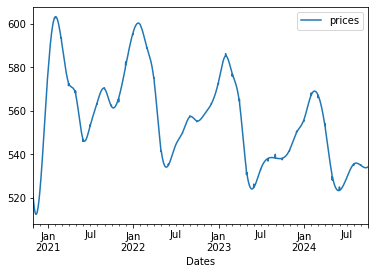

In [37]:
interpolated.plot()
